<span style="color: #f2cf4a ; font-family: Babas; font-size: 3em;">$$P^3$$</span>
===
 <center> <span style="color: #f2cf4a ; font-family: Babas; font-size: 3em;">P</span><span style="color: #00000; font-family: Babas; font-size: 3em;">robabilistic </span> <span style="color: #f2cf4a ; font-family: Babas; font-size: 3em;">P</span><span style="color: #00000; font-family: Babas; font-size: 3em;">recipitation </span><span style="color: #f2cf4a ; font-family: Babas; font-size: 3em;">P</span><span style="color: #00000; font-family: Babas; font-size: 3em;">rediction </span>  </center>
********

## Imports

In [2]:
%matplotlib inline
import os

import datetime as dt
import numpy as np
import pandas as pd
import statsmodels

from IPython.display import display, HTML
import matplotlib.pyplot as plt

## Directories

In [3]:
# Setup directories
CWD = os.getcwd()

DATA_DIR = CWD + "/data/"
CLEAN_DATA_DIR = DATA_DIR + "clean/"
OUT_DIR = CWD + "/output/"

## Preview Data

In [4]:
f = open(DATA_DIR+"eng-daily-01012016-12312016.csv.2", "r")
lines = f.readlines()
lines = lines[25:]
f.close()

f = open(CLEAN_DATA_DIR+"eng-daily-01012016-12312016.csv.2", "w+")
f.writelines(lines)
f.truncate()
f.close()

prev = pd.read_csv(CLEAN_DATA_DIR+"eng-daily-01012016-12312016.csv.2")
display(prev)

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,2016-01-01,2016,1,1,‡,-0.3,NaN,-4.2,NaN,-2.3,...,0.8,NaN,0.8,NaN,0.0,NaN,25.0,NaN,46,NaN
1,2016-01-02,2016,1,2,‡,0.3,NaN,-4.3,NaN,-2.0,...,0.0,T,0.0,T,0.0,NaN,23.0,NaN,44,NaN
2,2016-01-03,2016,1,3,‡,1.6,NaN,-11.6,NaN,-5.0,...,0.0,T,0.0,T,0.0,NaN,34.0,NaN,54,NaN
3,2016-01-04,2016,1,4,‡,-11.2,NaN,-15.4,NaN,-13.3,...,0.0,T,0.0,T,0.0,NaN,2.0,NaN,37,NaN
4,2016-01-05,2016,1,5,‡,-2.6,NaN,-15.2,NaN,-8.9,...,0.0,NaN,0.0,NaN,0.0,NaN,23.0,NaN,32,NaN
5,2016-01-06,2016,1,6,‡,2.4,NaN,-6.8,NaN,-2.2,...,0.0,NaN,0.0,NaN,0.0,NaN,23.0,NaN,32,NaN
6,2016-01-07,2016,1,7,‡,4.4,NaN,-5.3,NaN,-0.5,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,<31,NaN
7,2016-01-08,2016,1,8,‡,4.1,NaN,-5.6,NaN,-0.8,...,0.0,NaN,2.8,NaN,NaN,NaN,NaN,NaN,<31,NaN
8,2016-01-09,2016,1,9,‡,8.6,NaN,2.8,NaN,5.7,...,0.0,NaN,2.0,NaN,0.0,NaN,NaN,NaN,<31,NaN
9,2016-01-10,2016,1,10,‡,6.8,NaN,-6.5,NaN,0.2,...,0.2,NaN,18.4,NaN,0.0,NaN,28.0,NaN,85,NaN


## Build Training Set

In [5]:
def clean_data(in_dir, out_dir, filename):
    """
    
    """
    f = open(in_dir+filename, "r")
    lines = f.readlines()
    lines = lines[25:]
    f.close()

    f = open(out_dir+filename, "w+")
    f.writelines(lines)
    f.truncate()
    f.close()

In [16]:
train_data = None

for filename in os.listdir(DATA_DIR):
    if filename != "clean":
        clean_data(DATA_DIR, CLEAN_DATA_DIR, filename)
        if train_data is None:
            train_data = pd.read_csv(CLEAN_DATA_DIR+filename)
        else:
            train_data.append(pd.read_csv(CLEAN_DATA_DIR+filename))

train_data["Date/Time"] = pd.to_datetime(train_data["Date/Time"], format="%Y-%m-%d")
display(train_data)

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,2016-01-01,2016,1,1,‡,-0.3,NaN,-4.2,NaN,-2.3,...,0.8,NaN,0.8,NaN,0.0,NaN,25.0,NaN,46,NaN
1,2016-01-02,2016,1,2,‡,0.3,NaN,-4.3,NaN,-2.0,...,0.0,T,0.0,T,0.0,NaN,23.0,NaN,44,NaN
2,2016-01-03,2016,1,3,‡,1.6,NaN,-11.6,NaN,-5.0,...,0.0,T,0.0,T,0.0,NaN,34.0,NaN,54,NaN
3,2016-01-04,2016,1,4,‡,-11.2,NaN,-15.4,NaN,-13.3,...,0.0,T,0.0,T,0.0,NaN,2.0,NaN,37,NaN
4,2016-01-05,2016,1,5,‡,-2.6,NaN,-15.2,NaN,-8.9,...,0.0,NaN,0.0,NaN,0.0,NaN,23.0,NaN,32,NaN
5,2016-01-06,2016,1,6,‡,2.4,NaN,-6.8,NaN,-2.2,...,0.0,NaN,0.0,NaN,0.0,NaN,23.0,NaN,32,NaN
6,2016-01-07,2016,1,7,‡,4.4,NaN,-5.3,NaN,-0.5,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,<31,NaN
7,2016-01-08,2016,1,8,‡,4.1,NaN,-5.6,NaN,-0.8,...,0.0,NaN,2.8,NaN,NaN,NaN,NaN,NaN,<31,NaN
8,2016-01-09,2016,1,9,‡,8.6,NaN,2.8,NaN,5.7,...,0.0,NaN,2.0,NaN,0.0,NaN,NaN,NaN,<31,NaN
9,2016-01-10,2016,1,10,‡,6.8,NaN,-6.5,NaN,0.2,...,0.2,NaN,18.4,NaN,0.0,NaN,28.0,NaN,85,NaN


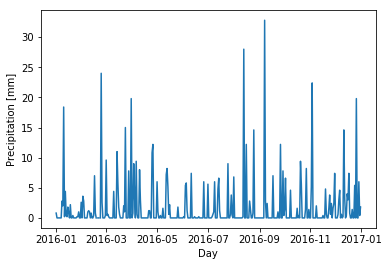

In [21]:
plt.plot(train_data["Date/Time"], train_data["Total Precip (mm)"])
plt.ylabel("Precipitation [mm]")
plt.xlabel("Day")